<a href="https://colab.research.google.com/github/biranchi2018/CoronaRegression/blob/master/Corona_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np

In [41]:
# xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])

ys = np.array([38.03, 42.10, 44.04, 45.01, 47.25, 49.69, 52.19, 53.38, 56.50])
# ys = np.array([38.03, 42.10, 44.04, 45.01, 47.25, 49.69, 52.19, 53.38])

ys

array([38.03, 42.1 , 44.04, 45.01, 47.25, 49.69, 52.19, 53.38])

In [42]:
len(ys)

8

In [43]:
xs = []
xs_range = range(0,len(ys))
print(xs_range)
for i in xs_range:
  xs.append(i+1)

xs = np.array(xs, dtype=np.float32)
xs

range(0, 8)


array([1., 2., 3., 4., 5., 6., 7., 8.], dtype=float32)

In [44]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, input_dim=1, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss') < 0.05):
      print("\nReached mse < 0.05 cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/20))

In [0]:
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

In [0]:
# model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
# model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

In [0]:
history = model.fit(xs, ys, validation_split=0.2, epochs=1500, callbacks=[callbacks], verbose=0)

In [50]:
xs_next = np.max(xs)+1
xs_next = np.array([xs_next])
xs_next

array([9.])

In [0]:
# x_test = np.array([9.0])
# x_test

In [52]:
x_test = xs_next
print(f'x_test : {x_test}')
pred = model.predict(x_test)[0][0]
pred

x_test : [9.]


55.105186

In [53]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [54]:
type(history.history.keys())

dict_keys

In [55]:
keys = list(history.history.keys())
keys

['loss', 'mse', 'val_loss', 'val_mse']

In [0]:
# tr_epochs = range(len(history.history['loss']))
# tr_epochs

In [0]:
# val_epochs = range(len(history.history['mse']))
# val_epochs

In [0]:
train_loss = history.history[keys[0]]
train_mse = history.history[keys[1]]
val_loss = history.history[keys[2]]
val_mse = history.history[keys[3]]

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

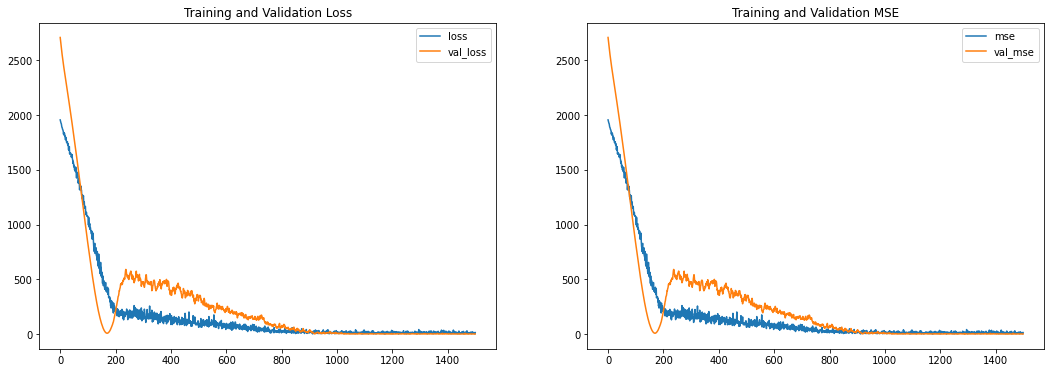

In [60]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(range(len(train_loss)), train_loss, label=keys[0])
plt.plot(range(len(val_loss)), val_loss, label=keys[2])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(122)
plt.plot(range(len(train_mse)), train_mse, label=keys[1])
plt.plot(range(len(val_mse)), val_mse, label=keys[3])
plt.legend(loc='upper right')
plt.title('Training and Validation MSE')

plt.show()